# Temática: problemática del agua en México

### Basado en el Objetivo de Desarrollo Sostenible 6: Garantizar la disponibilidad de agua y su gestión sostenible y el saneamiento.

Concurso para la presentación de soluciones a retos de impacto social que tengan el análisis y la manipulación de datos, así como 
la extracción y presentación de información, como elementos fundamentales para el desarrollo de una propuesta de 
implementación.

In [26]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null # Instalación de java
!wget -q https://archive.apache.org/dist/spark/spark-3.2.2/spark-3.2.2-bin-hadoop3.2.tgz # Traemos archivos de APACHE
!tar xf spark-3.2.2-bin-hadoop3.2.tgz # Traemos los archivos de Spark
!pip -q install findspark # Isntalamos findspark

^C
^C


In [ ]:
!ls # Revisamos qué hay en el directorio

sample_data  spark-3.2.2-bin-hadoop3.2	spark-3.2.2-bin-hadoop3.2.tgz


In [ ]:
# No correr, fue para quitar los duplicados de las bases de datos
#!rm -r spark-3.2.2-bin-hadoop3.2

In [ ]:
# Instalamos Spark para Python
!pip -q install pyspark

     |████████████████████████████████| 281.4 MB 57 kB/s 
     |████████████████████████████████| 199 kB 66.5 MB/s 


In [167]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Instalamos GeoPandas
!pip -q install geopandas attrs shapely rtree apache-sedona[spark]

     |████████████████████████████████| 1.0 MB 9.8 MB/s 
     |████████████████████████████████| 1.0 MB 61.2 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
     |████████████████████████████████| 16.7 MB 63.0 MB/s 
     |████████████████████████████████| 6.3 MB 66.1 MB/s 


In [ ]:
# Descarga de Bases de Datos SCINCE 2020 y DENUE Mayo 2022

!gdown 1fLXusjBYsIxjvWolnmeaZXxKY4kaCjfL
!gdown 1dWUkR4gxf8ngaF9y4mfn8OJmsIbAYYgP

Downloading...
From: https://drive.google.com/uc?id=1fLXusjBYsIxjvWolnmeaZXxKY4kaCjfL
To: /content/SCINCE_Parquets.zip
100% 1.07G/1.07G [00:11<00:00, 94.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dWUkR4gxf8ngaF9y4mfn8OJmsIbAYYgP
To: /content/DENUE_Parquets.zip
100% 486M/486M [00:04<00:00, 109MB/s] 


# Descompactar los datos

In [ ]:
# Leemos cuáles son los archivos ZIP con los que contamos
!ls /content/*.zip

/content/DENUE_Parquets.zip  /content/SCINCE_Parquets.zip


In [ ]:
# Extraemos el ZIP de DENUE
!unzip /content/DENUE_Parquets.zip -d /content/DENUE_Parquets/ &> /dev/null

In [ ]:
# Extraemos el ZIP de SCIENCE
!unzip /content/SCINCE_Parquets.zip -d /content/SCINCE_Parquets/ &> /dev/null

In [ ]:
# Revisamos los Parquets obtenidos
!ls /content/DENUE_Parquets

01.parquet  07.parquet	13.parquet    18.parquet  24.parquet  30.parquet
02.parquet  08.parquet	14.parquet    19.parquet  25.parquet  31.parquet
03.parquet  09.parquet	15_1.parquet  20.parquet  26.parquet  32.parquet
04.parquet  10.parquet	15_2.parquet  21.parquet  27.parquet
05.parquet  11.parquet	16.parquet    22.parquet  28.parquet
06.parquet  12.parquet	17.parquet    23.parquet  29.parquet


# Inicio de Apache Spark y Apache Sedona

In [ ]:
# Importamos las librerías de interés

import findspark # Spark
findspark.init()
import shapely 
import pandas as pd # Pandas 
import geopandas as gpd # Geopandas
from pyspark.sql import SparkSession # Spark para SQL
from pyspark import SparkContext
from pyspark import SparkConf
from sedona.register import SedonaRegistrator #Sedona
from sedona.utils import SedonaKryoRegistrator, KryoSerializer
spark = SparkSession. \
builder. \
appName('GeoBigData'). \
config("spark.serializer", KryoSerializer.getName). \
config("spark.executor.memory", "5g"). \
config("spark.driver.memory", "10g"). \
config('spark.driver.maxResultSize', '5g'). \
config("spark.kryo.registrator", SedonaKryoRegistrator.getName). \
config('spark.jars.packages',
           'org.apache.sedona:sedona-python-adapter-3.0_2.12:1.2.0-incubating,'
           'org.datasyslab:geotools-wrapper:1.1.0-25.2'). \
getOrCreate()
SedonaRegistrator.registerAll(spark)

True

## Leer Datos

Parquet is a columnar format that is supported by many other data processing systems. Spark SQL provides support for both reading and writing Parquet files that automatically preserves the schema of the original data. When reading Parquet files, all columns are automatically converted to be nullable for compatibility reasons.

............................................................................................................................................................................................................

cache() es una transformación de Apache Spark que se puede usar en un DataFrame, Dataset o RDD cuando desee realizar más de una acción. cache() almacena en caché el DataFrame, Dataset o RDD especificados en la memoria de los trabajos del clúster. Puesto que cache() es una transformación, la operación de almacenamiento en caché tiene lugar solo cuando una acción de Spark (por ejemplo, count(), show(), take() o write()) también se usa en el mismo DataFrame, Dataset o RDD en una única acción.

In [89]:
# Leer parquet con Spark
# 16_MICH.parquet
# 01_AGS Aguascalientes
# 19_NL Nuevo Leon

BD_MANZANAS = spark.read.parquet(f"/content/SCINCE_Parquets/SCINCE_Parquets/16_MICH.parquet")



# Variables de interés (Definimos la lista)
# No se editan las variables de 'CVEGEO' ni 'geometry'
#Var_INTERES = ['CVEGEO', 'VIV17', 'VIV23', 'VIV25', 'VIV90', 'VIV91', 'geometry']
Var_INTERES = ['CVEGEO', 'VIV17', 'VIV23', 'VIV25', 'VIV90', 'VIV91', 'geometry']

# Seleccionamos las columnas de interés del archivo parquet
BD_MANZANAS_EEVVV = BD_MANZANAS.select(Var_INTERES)
# Explicación de caché en la celda de texto anterior
BD_MANZANAS_EEVVV.cache()
# Esquema con detalles de los datos en las columnas
BD_MANZANAS_EEVVV.printSchema()

# A DataFrame is equivalent to a relational table in Spark SQL, 
# and can be created using various functions in SparkSession
BD_MANZANAS_EEVVV.show() # Mostramos el DataFrame

root
 |-- CVEGEO: string (nullable = true)
 |-- VIV17: double (nullable = true)
 |-- VIV23: double (nullable = true)
 |-- VIV25: double (nullable = true)
 |-- VIV90: double (nullable = true)
 |-- VIV91: double (nullable = true)
 |-- geometry: geometry (nullable = true)

+----------------+-----+-----+-----+-----+-----+--------------------+
|          CVEGEO|VIV17|VIV23|VIV25|VIV90|VIV91|            geometry|
+----------------+-----+-----+-----+-----+-----+--------------------+
|1600100010028010| 19.0| 19.0| 19.0| 17.0|  5.0|POLYGON ((2569921...|
|1600100010028011| 16.0| 16.0| 16.0| 13.0|  7.0|POLYGON ((2569921...|
|1600100010028012| 24.0| 24.0| 24.0| 23.0| 15.0|POLYGON ((2569754...|
|1600100010028013|  7.0|  7.0|  7.0|  7.0|  4.0|POLYGON ((2569753...|
|1600100010028028| 24.0| 24.0| 24.0| 23.0|  8.0|POLYGON ((2569690...|
|1600100010028042| 12.0| 12.0| 12.0| 11.0|  0.0|POLYGON ((2570201...|
|1600100010028050| 19.0| 17.0| 17.0| 14.0| -6.0|POLYGON ((2569382...|
|1600100010051001| 11.0| 11.0

In [90]:
# createOrReplaceTempView
# Creates or replaces a local temporary view with this DataFrame.
# The lifetime of this temporary table is tied to the SparkSession that was used to create this DataFrame.
BD_MANZANAS_EEVVV.createOrReplaceTempView("manzanas")

In [91]:
# Limpieza de los datos negativos y nulos
# Se tienen que cambiar los nombres de las columnas según los criterios elegidos

BD_MZA_EEVVV_CORREGIDO = spark.sql(("""select 
                                  CVEGEO,
                                  if( (isnull({V1}) or {V1} < 0 ), 0, {V1}) as {V1}, 
                                  if( (isnull({V2}) or {V2} < 0 ), 0, {V2}) as {V2},
                                  if( (isnull({V3}) or {V3} < 0 ), 0, {V3}) as {V3},
                                  if( (isnull({V4}) or {V4} < 0 ), 0, {V4}) as {V4},
                                  if( (isnull({V5}) or {V5} < 0 ), 0, {V5}) as {V5},                                  
                                  geometry
                             from manzanas """).format(V1 = Var_INTERES[1], V2 = Var_INTERES[2], V3 = Var_INTERES[3], V4 = Var_INTERES[4], V5 = Var_INTERES[5]))
BD_MZA_EEVVV_CORREGIDO.cache()
BD_MZA_EEVVV_CORREGIDO.show()

+----------------+-----+-----+-----+-----+-----+--------------------+
|          CVEGEO|VIV17|VIV23|VIV25|VIV90|VIV91|            geometry|
+----------------+-----+-----+-----+-----+-----+--------------------+
|1600100010028010| 19.0| 19.0| 19.0| 17.0|  5.0|POLYGON ((2569921...|
|1600100010028011| 16.0| 16.0| 16.0| 13.0|  7.0|POLYGON ((2569921...|
|1600100010028012| 24.0| 24.0| 24.0| 23.0| 15.0|POLYGON ((2569754...|
|1600100010028013|  7.0|  7.0|  7.0|  7.0|  4.0|POLYGON ((2569753...|
|1600100010028028| 24.0| 24.0| 24.0| 23.0|  8.0|POLYGON ((2569690...|
|1600100010028042| 12.0| 12.0| 12.0| 11.0|  0.0|POLYGON ((2570201...|
|1600100010028050| 19.0| 17.0| 17.0| 14.0|  0.0|POLYGON ((2569382...|
|1600100010051001| 11.0| 11.0| 11.0| 10.0|  5.0|POLYGON ((2569103...|
|1600100010051009| 12.0| 12.0| 12.0| 12.0|  4.0|POLYGON ((2569360...|
|1600100010051011| 12.0| 12.0| 12.0|  8.0|  6.0|POLYGON ((2568788...|
|1600100010051012|  5.0|  5.0|  5.0|  4.0|  0.0|POLYGON ((2568908...|
|1600100010051016|  

In [92]:
# VectorAssembler: A feature transformer that merges multiple columns into a vector column.
from pyspark.ml.feature import VectorAssembler 
from pyspark.ml.clustering import KMeans # Importamos el algoritmo de K.means


# Transformar las múltiples columnas en un solo vector columna
# Esto se hace por las necesidades de pyspark

vecAssembler = VectorAssembler(inputCols=Var_INTERES[1:6], outputCol="features")
BD_MZA_EEVVV_CORREGIDO_VEC = vecAssembler.transform(BD_MZA_EEVVV_CORREGIDO)
BD_MZA_EEVVV_CORREGIDO_VEC.cache()
BD_MZA_EEVVV_CORREGIDO_VEC.show()

+----------------+-----+-----+-----+-----+-----+--------------------+--------------------+
|          CVEGEO|VIV17|VIV23|VIV25|VIV90|VIV91|            geometry|            features|
+----------------+-----+-----+-----+-----+-----+--------------------+--------------------+
|1600100010028010| 19.0| 19.0| 19.0| 17.0|  5.0|POLYGON ((2569921...|[19.0,19.0,19.0,1...|
|1600100010028011| 16.0| 16.0| 16.0| 13.0|  7.0|POLYGON ((2569921...|[16.0,16.0,16.0,1...|
|1600100010028012| 24.0| 24.0| 24.0| 23.0| 15.0|POLYGON ((2569754...|[24.0,24.0,24.0,2...|
|1600100010028013|  7.0|  7.0|  7.0|  7.0|  4.0|POLYGON ((2569753...|[7.0,7.0,7.0,7.0,...|
|1600100010028028| 24.0| 24.0| 24.0| 23.0|  8.0|POLYGON ((2569690...|[24.0,24.0,24.0,2...|
|1600100010028042| 12.0| 12.0| 12.0| 11.0|  0.0|POLYGON ((2570201...|[12.0,12.0,12.0,1...|
|1600100010028050| 19.0| 17.0| 17.0| 14.0|  0.0|POLYGON ((2569382...|[19.0,17.0,17.0,1...|
|1600100010051001| 11.0| 11.0| 11.0| 10.0|  5.0|POLYGON ((2569103...|[11.0,11.0,11.0,1...|

## Implementación de algoritmo de aprendizaje no supervisado: K means

Con la base de datos limpia y pre trabajada, podemos proceder al primer análisis. En este caso se implementa un algoritmo de aprendizaje no supervisado: K-means.



k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances.


Obtenido de: 
https://en.wikipedia.org/wiki/K-means_clustering




In [93]:
kmeans = KMeans(k=5, seed=1, maxIter=250) 
model = kmeans.fit(BD_MZA_EEVVV_CORREGIDO_VEC.select('features'))
transformed = model.transform(BD_MZA_EEVVV_CORREGIDO_VEC)
transformed.show() # Mostramos solo 10 celdas

+----------------+-----+-----+-----+-----+-----+--------------------+--------------------+----------+
|          CVEGEO|VIV17|VIV23|VIV25|VIV90|VIV91|            geometry|            features|prediction|
+----------------+-----+-----+-----+-----+-----+--------------------+--------------------+----------+
|1600100010028010| 19.0| 19.0| 19.0| 17.0|  5.0|POLYGON ((2569921...|[19.0,19.0,19.0,1...|         3|
|1600100010028011| 16.0| 16.0| 16.0| 13.0|  7.0|POLYGON ((2569921...|[16.0,16.0,16.0,1...|         3|
|1600100010028012| 24.0| 24.0| 24.0| 23.0| 15.0|POLYGON ((2569754...|[24.0,24.0,24.0,2...|         2|
|1600100010028013|  7.0|  7.0|  7.0|  7.0|  4.0|POLYGON ((2569753...|[7.0,7.0,7.0,7.0,...|         1|
|1600100010028028| 24.0| 24.0| 24.0| 23.0|  8.0|POLYGON ((2569690...|[24.0,24.0,24.0,2...|         3|
|1600100010028042| 12.0| 12.0| 12.0| 11.0|  0.0|POLYGON ((2570201...|[12.0,12.0,12.0,1...|         3|
|1600100010028050| 19.0| 17.0| 17.0| 14.0|  0.0|POLYGON ((2569382...|[19.0,17.0,17

In [94]:
# Editar el "order by mean_No_Agua_Entub"

# Crea o reemplaza una vista temporal local con este DataFrame.
# La duración de esta tabla temporal está vinculada a la SparkSession que se usó para crear este DataFrame.

transformed.createOrReplaceTempView("result_kmeans")

# Se colocan los clusters con los skssikkjjjkjkkjjkxjksjjbjbjddddnjkDBDKBDKJDBKSDBDKDBSDBSKDBSKJDBSKHBGDJKSBDJKBSJDSKDBJHSASBKHSADBFKKFIKBSDJFAHU
clusters = spark.sql((""" select prediction, 
    mean({V1}) as mean_Si_Agua_Entub, 
    mean({V2}) as mean_Si_Drenaje,
    mean({V3}) as mean_Si_Elec_Agua_Drenaje,
    mean({V4}) as mean_Si_Tinaco,
    mean({V5}) as mean_Si_Cisterna,
    count(*) as conteo
from result_kmeans group by prediction order by mean_Si_Agua_Entub""").format(V1 = Var_INTERES[1], V2 = Var_INTERES[2], V3 = Var_INTERES[3], V4 = Var_INTERES[4], V5 = Var_INTERES[5]))

clusters.show()

+----------+------------------+------------------+-------------------------+------------------+------------------+------+
|prediction|mean_Si_Agua_Entub|   mean_Si_Drenaje|mean_Si_Elec_Agua_Drenaje|    mean_Si_Tinaco|  mean_Si_Cisterna|conteo|
+----------+------------------+------------------+-------------------------+------------------+------------------+------+
|         1|3.3175294216779485|3.3520489846361263|        3.149818835491391| 2.458219812937112|0.9599471954610567| 35603|
|         3|15.902366083208726|  15.7975195707626|       15.599964816606562|12.986102559591872| 5.868282170815375| 22738|
|         2| 34.09718514923562| 33.96056782334385|        33.75054598398447| 29.69570492598884|12.405848095122543|  8242|
|         0| 71.06680161943319| 70.94264507422402|        70.60121457489879| 62.31781376518219|25.341430499325234|  1482|
|         4|181.90344827586208| 181.8896551724138|       180.83448275862068| 164.0344827586207| 76.17931034482758|   145|
+----------+------------

In [105]:
# Pasamos los clusters de un SQL a un DataFrame

df_clusters = clusters.toPandas()
df_clusters

,prediction,mean_Si_Agua_Entub,mean_Si_Drenaje,mean_Si_Elec_Agua_Drenaje,mean_Si_Tinaco,mean_Si_Cisterna,conteo
0,1,3.317529,3.352049,3.149819,2.458220,0.959947,35603
1,3,15.902366,15.797520,15.599965,12.986103,5.868282,22738
2,2,34.097185,33.960568,33.750546,29.695705,12.405848,8242
3,0,71.066802,70.942645,70.601215,62.317814,25.341430,1482
4,4,181.903448,181.889655,180.834483,164.034483,76.179310,145


In [96]:
# Importamos las librerías de manipulación numérica (numpy) y para graficar (matplotlib).

import numpy as np
import matplotlib.pyplot as plt

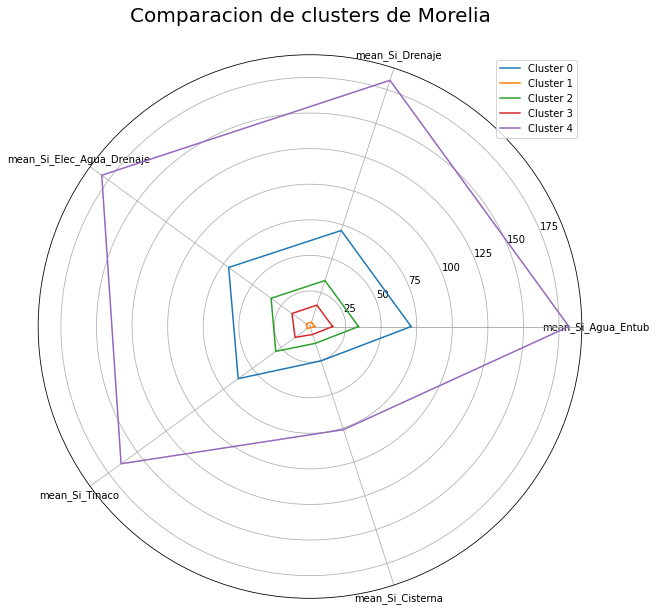

In [98]:
# Se definen los datos a graficar

categories = df_clusters.columns[1:-1].values
cluster_0 = df_clusters.where(df_clusters.prediction==0).dropna().values[0][1:-1]
cluster_1 = df_clusters.where(df_clusters.prediction==1).dropna().values[0][1:-1]
cluster_2 = df_clusters.where(df_clusters.prediction==2).dropna().values[0][1:-1]
cluster_3 = df_clusters.where(df_clusters.prediction==3).dropna().values[0][1:-1]
cluster_4 = df_clusters.where(df_clusters.prediction==4).dropna().values[0][1:-1]

cluster_0 = [*cluster_0,cluster_0[0]]
cluster_1 = [*cluster_1,cluster_1[0]]
cluster_2 = [*cluster_2,cluster_2[0]]
cluster_3 = [*cluster_3,cluster_3[0]]
cluster_4 = [*cluster_4,cluster_4[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cluster_0))

plt.figure(figsize=(10, 10)) # Se crea la figura
plt.subplot(polar=True) 
plt.plot(label_loc, cluster_0, label='Cluster 0')
plt.plot(label_loc, cluster_1, label='Cluster 1')
plt.plot(label_loc, cluster_2, label='Cluster 2')
plt.plot(label_loc, cluster_3, label='Cluster 3')
plt.plot(label_loc, cluster_4, label='Cluster 4')
plt.title('Comparacion de clusters de Morelia', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

# Visualización de datos (Mapa de Manzanas con servicios de Agua y Sanidad)

Se generan mapas del estado seleccionado (Michoacán) para ver el comportamiento geográfico de las variables seleccionadas.



In [99]:
# Definimos un SQL con las variables y los resultados de la predicción
df_manzanas = spark.sql(("""select {V1} as Si_Agua_Entub,
                                  {V2} as Si_Drenaje,
                                  {V3} as Si_Elec_Agua_Drenaje,
                                  {V4} as Si_Tinaco,
                                  {V5} as Si_Cisterna,
                                  geometry,
                                  prediction 
                           from result_kmeans""").format(V1 = Var_INTERES[1], V2 = Var_INTERES[2], V3 = Var_INTERES[3], V4 = Var_INTERES[4], V5 = Var_INTERES[5])).toPandas()


# Creamos un GeoDataFrame
# Un objeto GeoDataFrame es un pandas.DataFrame que tiene una columna con geometría. 
# Además de los argumentos estándar del constructor de DataFrame, 
# GeoDataFrame también acepta los siguientes argumentos de palabras clave:
geopandas_df_grid = gpd.GeoDataFrame(df_manzanas, geometry="geometry")



# geopandas_df_grid.set_crs Configure el Sistema de referencia de coordenadas (CRS) del GeoDataFrame.
geopandas_df_grid = geopandas_df_grid.set_crs('PROJCS["Mexico_ITRF2008_LCC",GEOGCS["Mexico_ITRF2008",DATUM["Mexico_ITRF2008",SPHEROID["GRS_1980",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP",AUTHORITY["EPSG","9802"]],PARAMETER["Central_Meridian",-102],PARAMETER["Latitude_Of_Origin",12],PARAMETER["False_Easting",2500000],PARAMETER["False_Northing",0],PARAMETER["Standard_Parallel_1",17.5],PARAMETER["Standard_Parallel_2",29.5],PARAMETER["Scale_Factor",1],UNIT["Meter",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","6372"]]')

# geopandas_df_grid.to_crs transforma geometrías a un nuevo sistema de referencia de coordenadas.
geopandas_df_grid = geopandas_df_grid.to_crs("EPSG:4326")
#geopandas_df_grid.to_file("/content/drive/MyDrive/GeoBigDataNube2022/resultados/manzanas_kmeans.shp")

In [100]:
# Folium es la biblioteca que permite la visualización de mapas interactivos
import folium

In [101]:
# Definimos el color para cada uno de los clusters, segun resultaron del k-means

def rank_colormap(gdf):
  if gdf['properties']['prediction'] is 4:
    return 'blue'
  if gdf['properties']['prediction'] is 3:
    return 'green'
  if gdf['properties']['prediction'] is 2:
    return 'yellow'
  if gdf['properties']['prediction'] is 1:
    return 'orange'
  if gdf['properties']['prediction'] is 0:
    return 'red'

In [102]:
# Morelia 19.7059504, -101.1949825
# Aguascalientes 21.8852562,-102.2915677
# Nuevo Leon 25.6507071,-100.2866162

m = folium.Map(location=[19.7059504, -101.1949825], zoom_start=14)

folium.GeoJson(data = geopandas_df_grid, name="Estratos",style_function = lambda feature: {
   'fillColor': rank_colormap(feature),
   'color': rank_colormap(feature),
   'weight': '0.5',
   'fill': True,
   'fill_opacity': '1'
}).add_to(m)

In [103]:
# Guardado del mapa debido a que Collab no lo soporta
m.save("mapMICH.html")
#webbrowser.open("mapNL.html")

# Estadística

In [161]:
BD_MANZANAS = spark.read.parquet(f"/content/SCINCE_Parquets/SCINCE_Parquets/16_MICH.parquet")



Var_INTERES = ['VIV17_R','ECO1_R']

# Seleccionamos las columnas de interés del archivo parquet
BD_MANZANAS_EEVVV = BD_MANZANAS.select(Var_INTERES)
# Explicación de caché en la celda de texto anterior
BD_MANZANAS_EEVVV.cache()
# Esquema con detalles de los datos en las columnas
BD_MANZANAS_EEVVV.printSchema()

# A DataFrame is equivalent to a relational table in Spark SQL, 
# and can be created using various functions in SparkSession
BD_MANZANAS_EEVVV.show() # Mostramos el DataFrame


BD_MANZANAS_EEVVV.createOrReplaceTempView("manzanas")

root
 |-- VIV17_R: double (nullable = true)
 |-- ECO1_R: double (nullable = true)

+-------+------+
|VIV17_R|ECO1_R|
+-------+------+
|  100.0|  52.7|
|  100.0|  67.3|
|  100.0|  61.8|
|  100.0|  58.8|
|  100.0|  55.4|
|  100.0|  60.0|
|  100.0|  62.7|
|  100.0|  44.2|
|  100.0|  56.8|
|  100.0|  58.8|
|  100.0|  55.6|
|  100.0|  41.7|
|  100.0|  60.0|
|   95.8|  47.9|
|  100.0|  71.4|
|  100.0|  54.5|
|   -8.0|  -8.0|
|  100.0|  62.5|
|  100.0|  55.7|
|  100.0|  61.1|
+-------+------+
only showing top 20 rows



In [172]:

BD_MZA_EEVVV_CORREGIDO = spark.sql(("""select
                                  if( (isnull({V1}) or {V1} < 0 ), 0, {V1}) as {V1}, 
                                  if( (isnull({V2}) or {V2} < 0 ), 0, {V2}) as {V2}
                             from manzanas """).format(V1 = Var_INTERES[0], V2 = Var_INTERES[1]))
BD_MZA_EEVVV_CORREGIDO.cache()
BD_MZA_EEVVV_CORREGIDO.show()

+-------+------+
|VIV17_R|ECO1_R|
+-------+------+
|  100.0|  52.7|
|  100.0|  67.3|
|  100.0|  61.8|
|  100.0|  58.8|
|  100.0|  55.4|
|  100.0|  60.0|
|  100.0|  62.7|
|  100.0|  44.2|
|  100.0|  56.8|
|  100.0|  58.8|
|  100.0|  55.6|
|  100.0|  41.7|
|  100.0|  60.0|
|   95.8|  47.9|
|  100.0|  71.4|
|  100.0|  54.5|
|    0.0|   0.0|
|  100.0|  62.5|
|  100.0|  55.7|
|  100.0|  61.1|
+-------+------+
only showing top 20 rows



In [163]:
Comparison = BD_MZA_EEVVV_CORREGIDO.toPandas()
Comparison

,VIV17_R,ECO1_R
0,100.0,52.7
1,100.0,67.3
2,100.0,61.8
3,100.0,58.8
4,100.0,55.4
...,...,...
68205,0.0,0.0
68206,0.0,0.0
68207,100.0,52.9
68208,100.0,80.0


<Figure size 720x720 with 0 Axes>

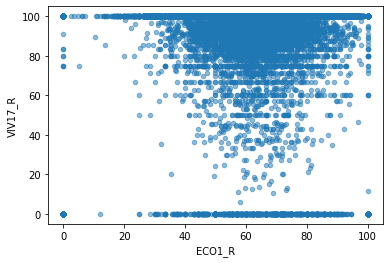

In [164]:
plt.figure(figsize=(10, 10)) # Se crea la figura
Comparison.plot.scatter(y="VIV17_R", x="ECO1_R", alpha=0.5)
plt.show()

In [168]:
from sklearn.linear_model import LinearRegression

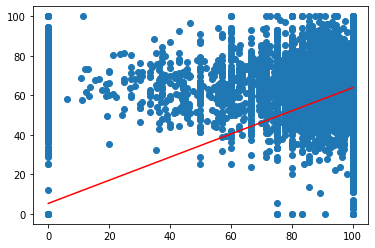

In [169]:
X = Comparison.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = Comparison.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

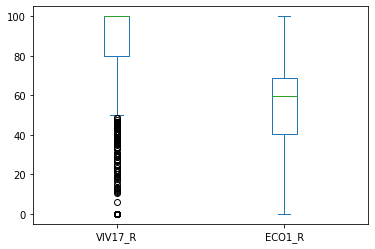

In [148]:
Comparison.plot.box()

# Análisis Descriptivo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f689a54a0d0>,
      dtype=object)

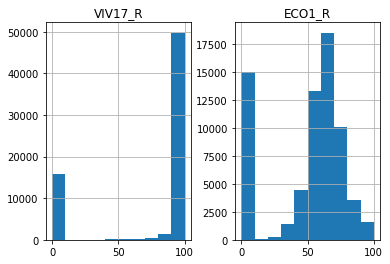

In [173]:
# Elaboración de Histrograma

Comparison.hist()

In [186]:
# Calculo de la media
mean_Comparison = Comparison.mean()
mean_Comparison

VIV17_R    75.607506
ECO1_R     49.564158
dtype: float64

In [187]:
# Cálculo de la varianza
var_Comparison = Comparison.var()
var_Comparison

VIV17_R    1760.597306
ECO1_R      822.207973
dtype: float64

In [188]:
# Cálculo de Desviación Estandar
desv_est_Comparison = Comparison.std()
desv_est_Comparison

VIV17_R    41.959472
ECO1_R     28.674169
dtype: float64

In [185]:
# Cálculo de Curtosis
kurtosis_Comparison = Comparison.kurtosis()
kurtosis_Comparison

VIV17_R   -0.466668
ECO1_R    -0.647224
dtype: float64